In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
# Load data from CSV URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

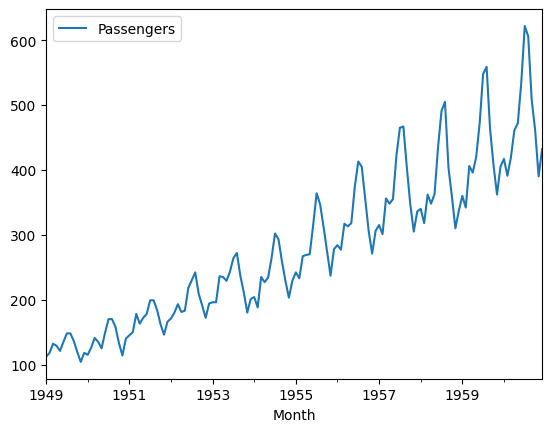

In [5]:
data.plot()
plt.show()

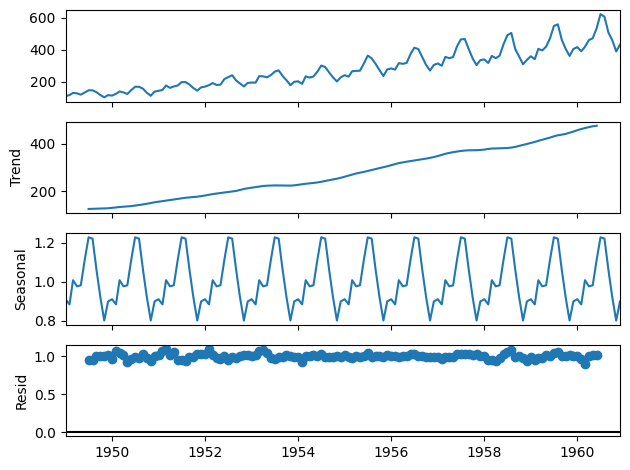

In [6]:
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

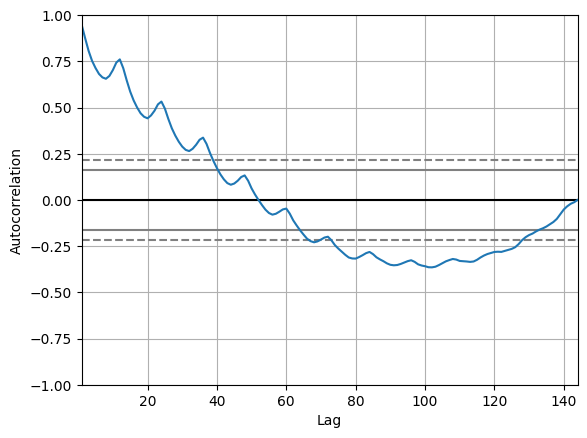

In [8]:
pd.plotting.autocorrelation_plot(data)

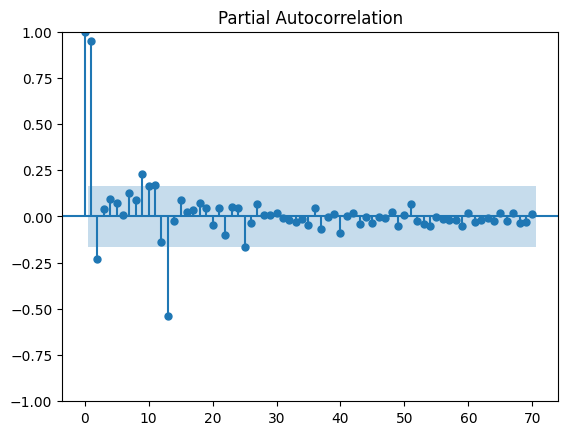

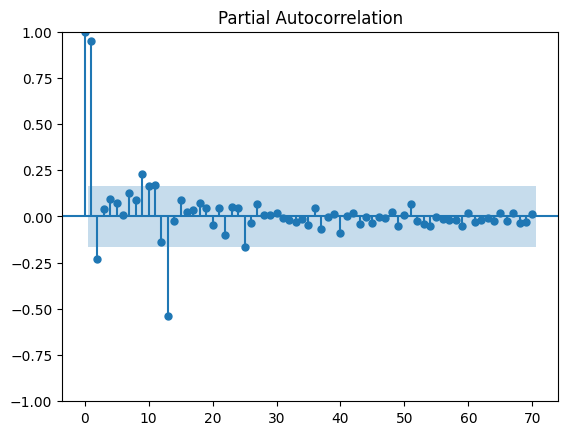

In [12]:
plot_pacf(data, lags = 70)

In [13]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data, order=(p, d, q), seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())
import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -490.642
Date:                            Wed, 20 Mar 2024   AIC                           1011.285
Time:                                    23:29:25   BIC                           1054.413
Sample:                                01-01-1949   HQIC                          1028.810
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2709      0.115    -11.006      0.000      -1.497      -1.045
ar.L2         -1.2424      0.140   

In [15]:
predictions = model.predict(len(data), len(data)+50)

<Axes: xlabel='Month'>

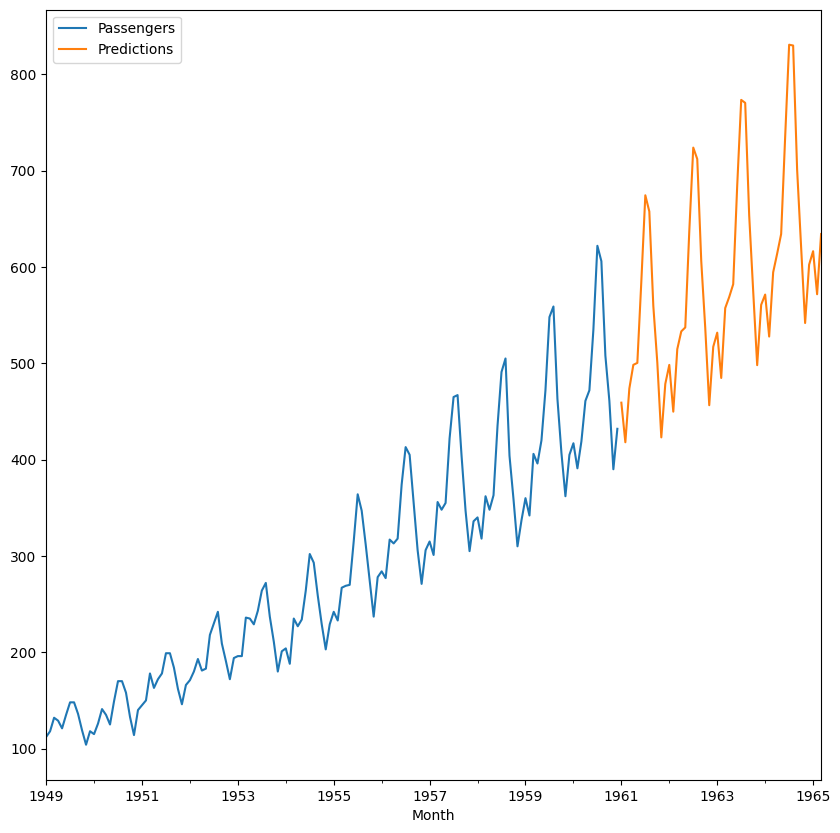

In [17]:
data.plot(legend=True, label="Training Data", figsize=(10, 10))
predictions.plot(legend=True, label="Predictions")